# Calculating the trajectory of a photon around a Schwarzschild blackhole

In [1]:
from curvedpy.geodesics.schwarzschild import GeodesicIntegratorSchwarzschildXYZ
from curvedpy.utils.conversions import Conversions
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
gi = GeodesicIntegratorSchwarzschildXYZ(mass = 1, time_like = False, verbose=False)

In [3]:
print(f"Radius of the blackhole in Schwarzschild radii: {gi.r_s_value}")

Radius of the blackhole in Schwarzschild radii: 2


## Example geodesic/trajectory of a photon that escapes

Exec. time:  0.9622468948364258
Integrator result:  The solver successfully reached the end of the integration interval.
Event of hitting the blackhole:  False


(-10.0, 10.0)

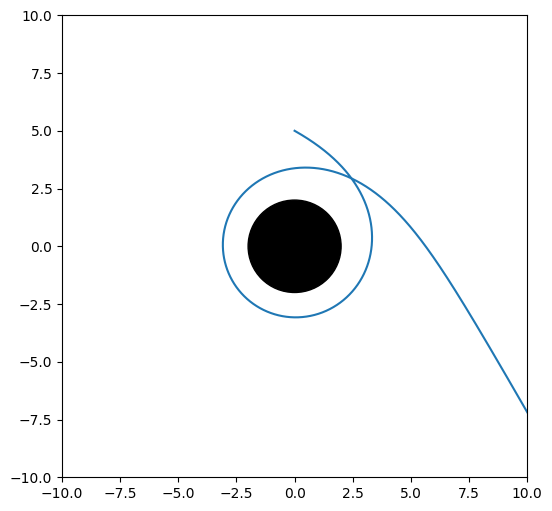

In [9]:
k0_xyz = np.array([1.0, -0.57, 0.0])
x0_xyz = np.array([0.0001, 5, 0])

st = time.time()
# k_xyz, x_xyz , result = gi.calc_trajectory(k0_xyz = k0_xyz, x0_xyz = x0_xyz, \
#                           verbose=False)


k_xyz, x_xyz , result = gi.calc_trajectory(k0_xyz, x0_xyz,max_step = 1.0,\
                                            curve_end=50, nr_points_curve=10000, verbose=False)
                         #  curve_start = self.start_t, \
                         #  curve_end = self.end_t, \
                         #  nr_points_curve = self.steps,\
                         # max_step=self.max_step)
print("Exec. time: ", time.time()-st)
print("Integrator result: ", result.message)
print("Event of hitting the blackhole: ", result.hit_blackhole)

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
ax.plot(*x_xyz[0:2])
plt.xlim(-10, 10)
plt.ylim(-10, 10)


## Example geodesic/trajectory of a photon that falls into the blackhole

Exec. time:  5.27311897277832
Integrator result:  A termination event occurred.
Event of hitting the blackhole:  True


(-7.0, 7.0)

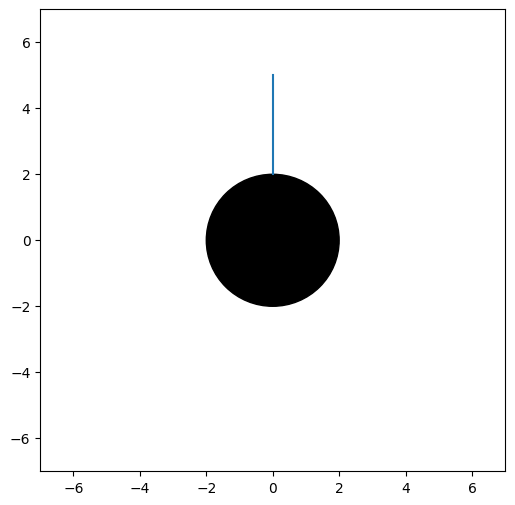

In [10]:
k0_xyz = np.array([0., -0.01, 0.0])
x0_xyz = np.array([0.0001, 5, 0])

st = time.time()
# k_xyz, x_xyz , result = gi.calc_trajectory(k0_xyz = k0_xyz, x0_xyz = x0_xyz, \
#                           verbose=False)


k_xyz, x_xyz , result = gi.calc_trajectory(k0_xyz, x0_xyz,max_step = 1.0,\
                                            curve_end=500, nr_points_curve=100,verbose=False)
                         #  curve_start = self.start_t, \
                         #  curve_end = self.end_t, \
                         #  nr_points_curve = self.steps,\
                         # max_step=self.max_step)
print("Exec. time: ", time.time()-st)
print("Integrator result: ", result.message)
print("Event of hitting the blackhole: ", result.hit_blackhole)

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
ax.plot(*x_xyz[0:2])
plt.xlim(-7, 7)
plt.ylim(-7, 7)


## Multiple photons starting at x=-10 and moving to the right

(-11.0, 11.0)

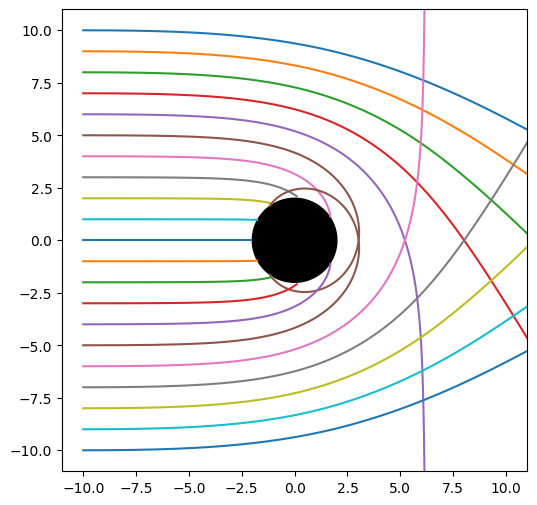

In [11]:
circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)

nr = 21
for k_xyz, x_xyz , result in gi.calc_trajectory(\
                        k0_xyz = [np.array([0.1, 0.0, 0.0]) for i in range(nr)], \
                        x0_xyz = [np.array([-10.0, 10-i, 0.0]) for i in range(nr)], \
                        curve_end=500, nr_points_curve=500, \
                        verbose=False):
    ax.plot(*x_xyz[0:2])

lim = 11
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)